<a href="https://colab.research.google.com/github/neelesh609/Digital-liquid-level-indicator/blob/main/Adamax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


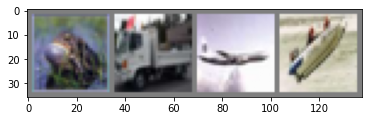

 frog truck plane  ship


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.fc1 = nn.Linear(64 * 4 * 4, 240)
        self.fc2 = nn.Linear(240, 168)
        self.fc3 = nn.Linear(168, 88)
        self.fc4 = nn.Linear(88, 10)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adamax(net.parameters(), lr=0.001)

In [ ]:
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.994
[1,  4000] loss: 1.672
[1,  6000] loss: 1.541
[1,  8000] loss: 1.429
[1, 10000] loss: 1.340
[1, 12000] loss: 1.274
[2,  2000] loss: 1.153
[2,  4000] loss: 1.149
[2,  6000] loss: 1.081
[2,  8000] loss: 1.048
[2, 10000] loss: 1.017
[2, 12000] loss: 0.981
[3,  2000] loss: 0.877
[3,  4000] loss: 0.862
[3,  6000] loss: 0.858
[3,  8000] loss: 0.849
[3, 10000] loss: 0.815
[3, 12000] loss: 0.798
[4,  2000] loss: 0.691
[4,  4000] loss: 0.709
[4,  6000] loss: 0.674
[4,  8000] loss: 0.667
[4, 10000] loss: 0.678
[4, 12000] loss: 0.685
[5,  2000] loss: 0.543
[5,  4000] loss: 0.565
[5,  6000] loss: 0.581
[5,  8000] loss: 0.563
[5, 10000] loss: 0.566
[5, 12000] loss: 0.578
[6,  2000] loss: 0.439
[6,  4000] loss: 0.454
[6,  6000] loss: 0.453
[6,  8000] loss: 0.473
[6, 10000] loss: 0.476
[6, 12000] loss: 0.484
[7,  2000] loss: 0.341
[7,  4000] loss: 0.360
[7,  6000] loss: 0.369
[7,  8000] loss: 0.366
[7, 10000] loss: 0.378
[7, 12000] loss: 0.400
[8,  2000] loss: 0.260
[8,  4000] 

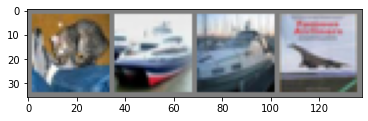

GroundTruth:    cat  ship  ship plane


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 76 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 72 %
Accuracy of   car : 67 %
Accuracy of  bird : 52 %
Accuracy of   cat : 45 %
Accuracy of  deer : 55 %
Accuracy of   dog : 44 %
Accuracy of  frog : 73 %
Accuracy of horse : 71 %
Accuracy of  ship : 70 %
Accuracy of truck : 81 %
